# Data and simulations

## Real founder genotypes

All the ressources from the *C. elegans* multiparent experimental evolution (CeMEE) RIL panel can be found [here](https://lukemn.github.io/cemee/).

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [3]:
plt.rc('axes', titlesize=15)
plt.rc('axes', labelsize=10)
plt.rc('xtick', labelsize=0)
plt.rc('ytick', labelsize=0)
plt.rc('figure', titlesize=20)

In [4]:
with open("Recombinations_genotypes_n16_p37525_G20_N50_I50.pkl","rb") as handler:
    geno = pickle.load(handler)
    F_geno = np.array(geno[:16])
F_geno.shape

(16, 37525)

**SNP** = Single Nucleotide Polymorphism.

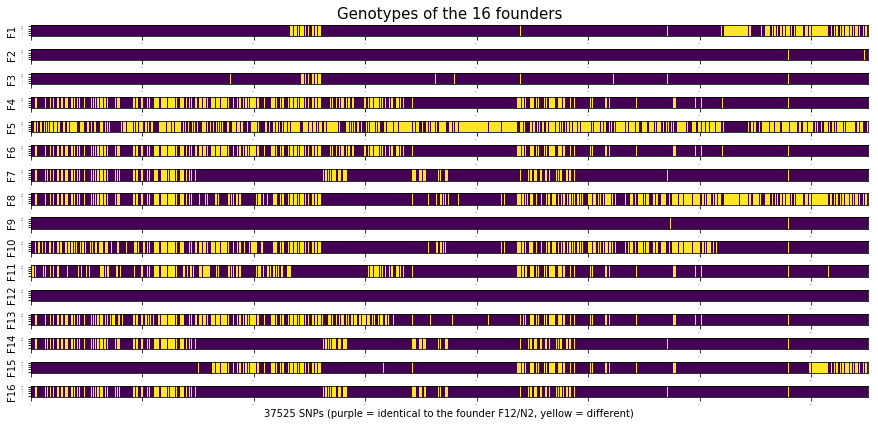

In [5]:
im, ax = plt.subplots(16,1, figsize = (15,7))
ax[0].set(title = "Genotypes of the 16 founders")
for k in range (16):
    ax[k].imshow (np.expand_dims(F_geno[k],1).T, aspect = 500)
    ax[k].set(ylabel = "F{}".format(k+1))
ax[15].set(xlabel = "37525 SNPs (purple = identical to the founder F12/N2, yellow = different)")
plt.show()

There is **a lot of redundancy** in the founders genotypes (sometimes more than 95% identity).

![](Images/Founders_similarity.png)

## Simulated founders

See the notebook : ```Simulate_recombination```.

In [6]:
with open("Simulations_genotypes_n16_p1000_G20_N100_I100.pkl","rb") as handler:
    geno = pickle.load(handler)
    F_geno = np.array(geno[:16])
F_geno.shape

(16, 1000)

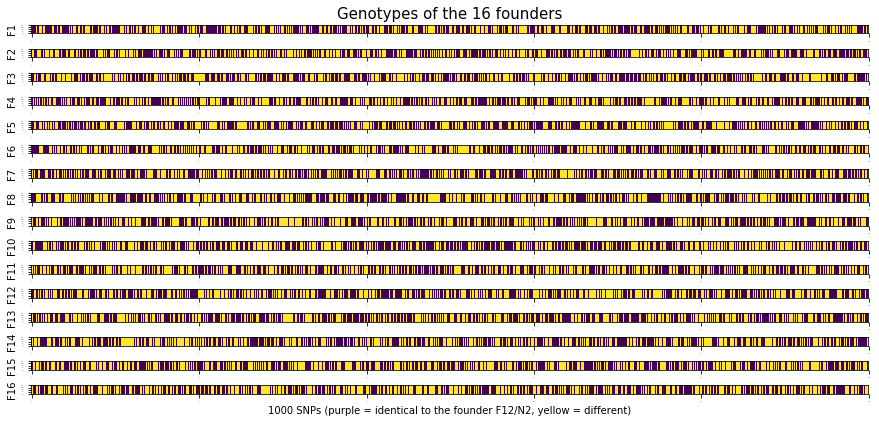

In [7]:
im, ax = plt.subplots(16,1, figsize = (15,7))
ax[0].set(title = "Genotypes of the 16 founders")
for k in range (16):
    ax[k].imshow (np.expand_dims(F_geno[k],1).T, aspect = 10)
    ax[k].set(ylabel = "F{}".format(k+1))
ax[15].set(xlabel = "1000 SNPs (purple = identical to the founder F12/N2, yellow = different)")
plt.show()

It will be much easier to test the models first with less SNPs and less similarities between founders.

## Simulate recombination

The simulations are based on the experiments presented on this article by Nobel L, Chelo I et al. [Polygenicity and Epistasis Underlie Fitness-Proximal Traits in the Caenorhabditis elegans Multiparental Experimental Evolution (CeMEE) Panel](http://dx.doi.org/10.1534/genetics.117.300406) Genetics December 1, 2017 vol. 207 no. 4 1663-1685; doi:10.1534/genetics.117.300406

![](Images/RILs.jpg)

In [8]:
n = 16    # founders
p = 1000  # nb of SNPs
G = 20    # nb of generations
N = 100   # number recombining individuals in a generation after sampling
I = 100  # nb of itérations

**Import simulations** : genotypes and haplotypes, F = founders, d = descendants.

In [9]:
with open("Simulations_haplotypes_n{0}_p{1}_G{2}_N{3}_I{4}.pkl".format(n,p,G,N,I),"rb") as handler:
    haplo = pickle.load(handler)
    F_haplo = np.array(haplo[:n])
    d_haplo = np.array(haplo[n:])
display(F_haplo.shape,d_haplo.shape)
        
with open("Simulations_genotypes_n{0}_p{1}_G{2}_N{3}_I{4}.pkl".format(n,p,G,N,I),"rb") as handler:
    geno = pickle.load(handler)
    F_geno = np.array(geno[:n])
    d_geno = np.array(geno[n:])

display(F_geno.shape,d_geno.shape)

(16, 1000)

(10000, 1000)

(16, 1000)

(10000, 1000)

In [10]:
plt.rc('axes', labelsize=15)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

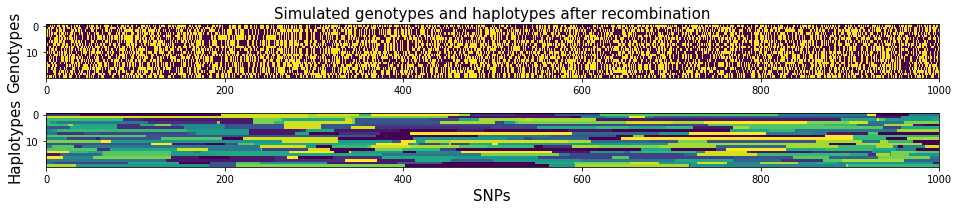

In [11]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(16,3))
ax1.imshow(np.array([d_geno[k] for k in range(0, 1000, 50)]), aspect = 3)
ax1.set(ylabel = "Genotypes", title = "Simulated genotypes and haplotypes after recombination")
ax2.imshow(np.array([d_haplo[k] for k in range(0, 1000, 50)]), aspect = 3)
ax2.set(ylabel = "Haplotypes", xlabel = "SNPs")
plt.show()

Thoses genotypes and haplotypes will be used as training and testing data (after reformating) for the networks.

# Summary of the results

Here are the **summary charts** for the different neural network architectures I tested :
   - "random" refers to simulated founders' genotypes
   - "real" refers to real founders' genotypes from the CeMEE dataset
   
   
   - The main variable parameters are :
      1. the number of SNPs
      2. the number of layers
      3. the types of neural networks employed
      4. the way of formatting the input

## Convolutional Neural Network (CNN) only

The initial architecture is inspired from the article by Flagel L, Brandvain Y, Schrider DR. [The Unreasonable Effectiveness of Convolutional Neural Networks in Population Genetic Inference](https://dx.doi.org/10.1093%2Fmolbev%2Fmsy224). Mol Biol Evol. 2019;36(2):220–238. doi:10.1093/molbev/msy224

If you want to see how we came to this CNN architecture, the tested variants are presented in the notebook ```CNN_models```.

| Model                        | SNPs           | Input                                         | Epochs | Accuracy |
|------------------------------|----------------|-----------------------------------------------|--------|----------|
| CNN                          | 1000 (random)  | 1 descendant + 16 founders                    | 23     | 94%      |
| CNN                          | 1015 (real)    | 1 descendant x17 + 16 founders + linkage x17  | 20     | 27%      |

## Recurrent Neural Network : Long-Short Term Memory (LSTM)

LSTM layers are expected to work well alone on sequence data but they are highly consuming of calculation and memory. CNN helps them reducing this problem by efficiently shrinking the size of the tensor given to the LSTMs. The 5 first architectures are detailled in this notebook after the summary.

Note that the last input with 12 founders only corresponds to the case where the most related founders have been merged in order to reduce cross similarity between founders' genotypes.

Most of the time the accuracy is calculated on independant testing data (otherwise on validating data).

| Model                        | SNPs          | Input                                        | Epochs    | Accuracy |
|------------------------------|---------------|----------------------------------------------|-----------|----------|
| LSTM                         | 1000 (random) | 1 descendant + 16 founders                   | 40        | 81%      |
| Bidirectional LSTM (Bi-LSTM) | 1000 (random) | 1 descendant + 16 founders                   | 85        | 95%      |
| CNN + Bi-LSTM                | 1000 (random) | 1 descendant + 16 founders                   | 92        | 87%      |
| CNN + Bi-LSTM                | 1015 (real)   | 1 descendant x17 + 16 founders + linkage x17 | 99        | 43%      |
| Bi-LSTM                      | 1015 (real)   | 1 descendant x17 + 16 founders + linkage x17 | 2x longer | 43%      |
| CNN + Bi-LSTM                | 37525 (real)  | 1 descendant x17 + 16 founders + linkage x17 | DEAD      | DEAD     |
| CNN + Bi-LSTM                | 12035 (real)  | 1 descendant x17 + 16 founders + linkage x17 | DEAD      | DEAD     |
| CNN + Bi-LSTM                | 12035 (real)  | 1 descendant x13 + 12 founders + linkage x13 | 61        | 48%      |

Results :
   - With the longuest genotypes, our computer was unable to train the model completely, requiring the design of an **"scalable" model** that has not been finished yet (see the notebook ```Scalable_CNN_LSTM.ipynb```)
   - The **best architecture (CNN + Bi-LSTM with full input)** will be retained from now

## Attention layer

We tried to add an attention layer just to see the result but it was not really adapted to our problem and the accuracy did not improved despite very long calculations. See the notebook ```Attention_NN.ipynb``` if you want to know more.

| Model                        | SNPs           | Input                                         | Epochs | Accuracy |
|------------------------------|----------------|-----------------------------------------------|--------|----------|
| CNN + Bi-LSTM + Attention    | 1015 (real)    | 1 descendant x17 + 16 founders + linkage x17  | 38     | 37%      |
| CNN + Bi-LSTM + Attention    | 100 (real)     | 1 descendant x17 + 16 founders + linkage x17  | 37     | 45%      |

## Scalable model

The idea is to segment data into smaller more manageable inputs and outputs. We want to train a model able to predict the haplotypes after training on all the short inputs, and then merge them to reconstruct the whole chromosome.

Given G recombination events (= generations because we assumed 1 recombination by generation), we can calculate the probability of having no recombination between 2 points with evenly distributed recombinations loci :<br>

$$P = \Big(\frac{\text{total length - length}}{\text{total length}}\Big)^\text{number of generations} = \Big(\frac{p - L}{p}\Big)^G$$

So we can get the minimum required length L to have most of the information ($99\%$) :

$$P>1\% \implies \Big(\frac{p - L}{p}\Big)^G > 0.01 \implies p - L > p \times \sqrt[G]{0.01} \implies L < p(1 - \sqrt[G]{0.01})$$

Then we can keep :
   - "2-lengths" (2 x L) = one at each side of a SNP whose we want to predict the corresponding founder
   - "4-lengths" (4 x L) = the two extreme lengths are used only to predict the haplotype of the internal part (arbitrarly chosen of 2-lengths long)

| Model                        | SNPs           | Input                                        | Epochs | Accuracy |
|------------------------------|----------------|----------------------------------------------|--------|----------|
| CNN + Bi-LSTM (2-lengths)    | 1015 (real)    | 1 descendant x17 + 16 founders + linkage x17 | 1      | 5%       |
| CNN + Bi-LSTM (4-lengths)    | 1015 (real)    | 1 descendant x17 + 16 founders + linkage x17 | 1      | 7%       |
| CNN + Bi-LSTM (4-lengths)    | 12035 (real)   | 1 descendant x17 + 16 founders + linkage x17 | 22     | 28%->23% |
| CNN + Bi-LSTM + less param   | 12035 (real)   | 1 descendant x17 + 16 founders + linkage x17 | 76     | 34%->28% |

The first 2 results correspond only to one epoch with 1015 SNPs to validate the idea, but it becomes more interesting with more SNPs. Note that after recombining, accuracy decreases instead of increasing as expected, a paradox that should be further explored. See the notebook ```Scalable_CNN_LSTM.ipynb``` if you want to know more.

# Testing on simulated founders

Simulated founders with random independant genotypes are expected to be much easier to analyse because they are completely unrelated and therefore the whole genotype sequences are maximaly informative for haplotype reconstruction. For example, there are very few long sequences shared between the founders leading to attribution difficulties after recombination.

## Format input and output data

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from keras.utils import np_utils
%matplotlib inline

/Users/jeje/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [1]:
n = 16    # founders
p = 1000  # nb of SNPs
G = 20    # nb of generations
N = 100   # number recombining individuals in a generation after sampling
I = 100   # nb of iterations

**Import simulations** : genotypes and haplotypes, F = founders, d = descendants.

In [14]:
with open("Simulations_haplotypes_n{0}_p{1}_G{2}_N{3}_I{4}.pkl".format(n,p,G,N,I),"rb") as handler:
    haplo = pickle.load(handler)
    F_haplo = np.array(haplo[:n])
    d_haplo = np.array(haplo[n:])
display(F_haplo.shape,d_haplo.shape)
        
with open("Simulations_genotypes_n{0}_p{1}_G{2}_N{3}_I{4}.pkl".format(n,p,G,N,I),"rb") as handler:
    geno = pickle.load(handler)
    F_geno = np.array(geno[:n])
    d_geno = np.array(geno[n:])

display(F_geno.shape,d_geno.shape)

(16, 1000)

(10000, 1000)

(16, 1000)

(10000, 1000)

**Separate** 3/4 of data for training and 1/4 for testing.

In [15]:
xtrain = d_geno[:3*I*N//4]
ytrain = d_haplo[:3*I*N//4]
xtest = d_geno[3*I*N//4:]
ytest = d_haplo[3*I*N//4:]
xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

((7500, 1000), (7500, 1000), (2500, 1000), (2500, 1000))

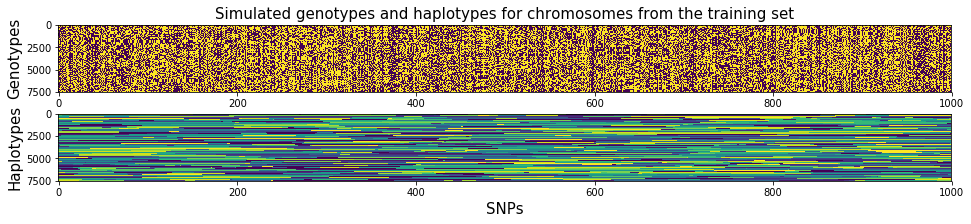

In [16]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(16,3))
ax1.imshow(xtrain, aspect = 0.01)
ax1.set(ylabel = "Genotypes", title = "Simulated genotypes and haplotypes for chromosomes from the training set")
ax2.imshow(ytrain, aspect = 0.01)
ax2.set(ylabel = "Haplotypes", xlabel = "SNPs")
plt.show()

**Input genotypes** : creating an "image" with the descendant (RIL) and the 16 founders.

In [17]:
def chromosome_input (array, F_geno, n):
    A = np.zeros((array.shape[0],array.shape[1],n+1))
    for k in range(len(array)) :
        individual = array[k]
        a = individual[:, np.newaxis]
        for l in range(len(F_geno)) :
            a=np.concatenate([a,F_geno[l:l+1].T], axis = 1)
        A[k]=a
    return A

**Output haplotypes** : founder origin for each SNP.

In [18]:
def chromosome_output (array):
    A = np.zeros((array.shape[0],array.shape[1],16))
    k = 0
    for individual in array :
        A[k] = np_utils.to_categorical(individual-1,16)
        k += 1
    return A

In [19]:
Xtrain = chromosome_input(xtrain, F_geno, n)
display(Xtrain.shape)
Ytrain = chromosome_output(ytrain)
display(Ytrain.shape)
Xtest = chromosome_input(xtest, F_geno, n)
display(Xtest.shape)
Ytest = chromosome_output(ytest)
display(Ytest.shape)

(7500, 1000, 17)

(7500, 1000, 16)

(2500, 1000, 17)

(2500, 1000, 16)

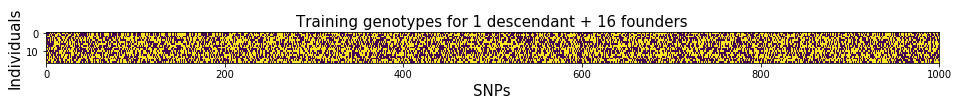

In [20]:
im, ax = plt.subplots(1,1,figsize=(16,6))
ax.imshow(Xtrain[0].T, aspect = 2)
ax.set(xlabel = "SNPs", ylabel = "Individuals", title = "Training genotypes for 1 descendant + 16 founders")
plt.show()

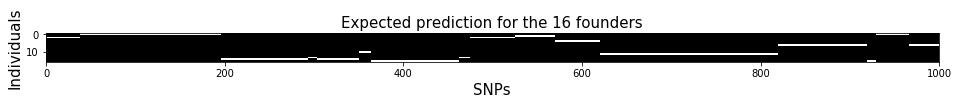

In [21]:
im, ax = plt.subplots(1,1,figsize=(16,6))
ax.imshow(Ytrain[0].T, aspect = 2, cmap = "Greys_r")
ax.set(xlabel = "SNPs", ylabel = "Individuals", title = "Expected prediction for the 16 founders")
plt.show()

## Simple LSTM

In [22]:
import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense, TimeDistributed
from keras.callbacks import ModelCheckpoint
from keras import backend as K
from keras.utils import np_utils, plot_model

**Define model** :

In [23]:
K.clear_session()

model = Sequential()
model.add(LSTM(10, input_shape=Xtest.shape[1:], return_sequences=True))
model.add(TimeDistributed(Dense(Ytest.shape[2], activation='softmax')))
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])
filepath="LSTM1_model_weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1000, 10)          1120      
_________________________________________________________________
time_distributed_1 (TimeDist (None, 1000, 16)          176       
Total params: 1,296
Trainable params: 1,296
Non-trainable params: 0
_________________________________________________________________
None


In [27]:
plot_model(model, show_shapes=True, to_file='Models/LSTM_model.png')

**Train model** : not performed on the notebook for the 100 epochs.

```
epochs=100
model.fit(Xtrain, Ytrain,
          epochs=epochs,
          callbacks=callbacks_list,
          verbose=1,
          validation_data=(Xtest, Ytest))
```

$\to$ The model saturated at **81% accuracy after 40 epochs**.

## Bidirectional LSTM

In [24]:
import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense, TimeDistributed, Bidirectional
from keras.callbacks import ModelCheckpoint
from keras import backend as K
from keras.utils import np_utils, plot_model

**Define model** :

In [25]:
K.clear_session()

model_2 = Sequential()
model_2.add(Bidirectional(LSTM(10, return_sequences=True), input_shape=Xtest.shape[1:]))
model_2.add(TimeDistributed(Dense(Ytest.shape[2], activation='softmax')))
model_2.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])
filepath="LSTM2_model_weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
print(model_2.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 1000, 20)          2240      
_________________________________________________________________
time_distributed_1 (TimeDist (None, 1000, 16)          336       
Total params: 2,576
Trainable params: 2,576
Non-trainable params: 0
_________________________________________________________________
None


In [26]:
plot_model(model_2, show_shapes=True, to_file='Models/LSTM2_model.png')

**Train model** : not performed on the notebook for the 100 epochs.

```
epochs=100
model_2.fit(Xtrain, Ytrain,
          epochs=epochs,
          callbacks=callbacks_list,
          verbose=1,
          validation_data=(Xtest, Ytest))
```

$\to$ The model saturated at **95% accuracy after 85 epochs**.

**Load Check-Pointed model and make predictions** : same simulations.

In [72]:
model_2 = Sequential()
model_2.add(Bidirectional(LSTM(10, return_sequences=True), input_shape=Xtest.shape[1:]))
model_2.add(TimeDistributed(Dense(Ytest.shape[2], activation='softmax')))
model_2.load_weights("Models/LSTM2_model_weights/LSTM2_model_weights-improvement-85-0.95.hdf5")       # load weights
model_2.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])
print(model_2.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_3 (Bidirection (None, 1000, 20)          2240      
_________________________________________________________________
time_distributed_5 (TimeDist (None, 1000, 16)          336       
Total params: 2,576
Trainable params: 2,576
Non-trainable params: 0
_________________________________________________________________
None


In [73]:
Ydata = Ytest
display(Ydata.shape)
Ypred = model_2.predict(Xtest)
display(Ypred.shape)

(2500, 1000, 16)

(2500, 1000, 16)

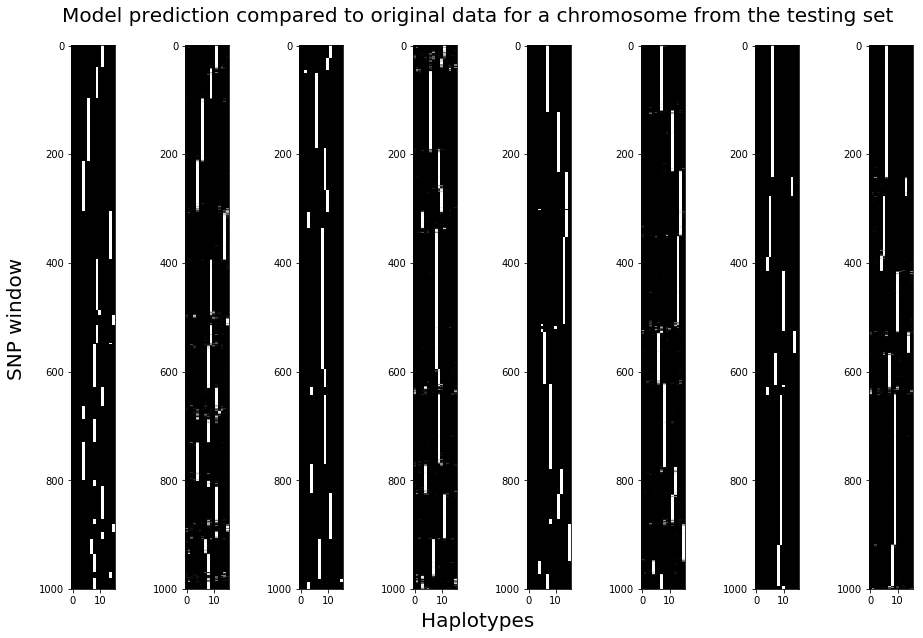

In [80]:
fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8) = plt.subplots(1,8,figsize=(16,10))
ax1.imshow(Ydata[0],cmap="Greys_r", aspect = 0.2)
ax2.imshow(Ypred[0],cmap="Greys_r", aspect = 0.2)
ax3.imshow(Ydata[1],cmap="Greys_r", aspect = 0.2)
ax4.imshow(Ypred[1],cmap="Greys_r", aspect = 0.2)
ax5.imshow(Ydata[2],cmap="Greys_r", aspect = 0.2)
ax6.imshow(Ypred[2],cmap="Greys_r", aspect = 0.2)
ax7.imshow(Ydata[3],cmap="Greys_r", aspect = 0.2)
ax8.imshow(Ypred[3],cmap="Greys_r", aspect = 0.2)
fig.text(0.5, 0.08, 'Haplotypes', ha='center', va='center',fontsize=20)
fig.text(0.1, 0.5, 'SNP window', ha='center', va='center', rotation='vertical',fontsize=20)
fig.text(0.5, 0.92, 'Model prediction compared to original data for a chromosome from the testing set', ha='center', va='center',fontsize=20)
plt.show()

## CNN + Bidirectional LSTM

In [28]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import LSTM, TimeDistributed, Bidirectional
from keras.layers import Conv1D, Conv2D, MaxPooling1D, AveragePooling1D
from keras.callbacks import ModelCheckpoint
from keras import backend as K
from keras.utils import np_utils, plot_model

**Format output** : convolutions reduce the dimensionality, therefore the output has to be reduced.

In [33]:
def chromosome_output_reduction (array):
    A = np.zeros((len(array),len(array[0])//2,16))
    for k in range(len(array)) :
        individual = array[k]
        A[k] = np.array([np_utils.to_categorical(segment[1]-1,16) for segment in np.reshape(individual[:len(individual)//2*2],(-1,2))])
    return A

In [35]:
Ytrain = chromosome_output_reduction(ytrain)
display(Ytrain.shape)
Ytest = chromosome_output_reduction(ytest)
display(Ytest.shape)

(7500, 500, 16)

(2500, 500, 16)

**Define model** :

In [39]:
K.clear_session()

model_3 = Sequential()
model_3.add(Conv1D(32, kernel_size=2,
                 activation='relu',
                 input_shape=Xtest.shape[1:],
                 padding = 'same'))
model_3.add(Conv1D(16, kernel_size=2, activation='relu', padding = 'same'))
model_3.add(AveragePooling1D(pool_size=2,strides=2))
model_3.add(Dropout(0.25))
model_3.add(Conv1D(16, kernel_size=2, activation='relu', padding = 'same'))
model_3.add(Dropout(0.25))
model_3.add(TimeDistributed(Dense(16, activation='relu')))
model_3.add(Dropout(0.5))
model_3.add(TimeDistributed(Dense(16, activation='relu')))
model_3.add(Dropout(0.5))
model_3.add(Bidirectional(LSTM(8, return_sequences=True)))
model_3.add(TimeDistributed(Dense(Ytest.shape[2], activation='softmax')))
model_3.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])
filepath="LSTM3_model_weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
print(model_3.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 1000, 32)          1120      
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 1000, 16)          1040      
_________________________________________________________________
average_pooling1d_1 (Average (None, 500, 16)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 500, 16)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 500, 16)           528       
_________________________________________________________________
dropout_2 (Dropout)          (None, 500, 16)           0         
_________________________________________________________________
time_distributed_1 (TimeDist (None, 500, 16)           272       
__________

In [40]:
plot_model(model_3, show_shapes=True, to_file='Models/LSTM3_model.png')

**Train model** : not performed on the notebook for the 100 epochs.

```
epochs=100
model_3.fit(Xtrain, Ytrain,
          epochs=epochs,
          callbacks=callbacks_list,
          verbose=1,
          validation_data=(Xtest, Ytest))```

$\to$ **Worse** than the previous model : reached **80% accuracy after 92 epochs**.

# Real data (1015 SNPs)

## CNN (full input) + Bidirectional LSTM

### Format input and output

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import LSTM, TimeDistributed, Bidirectional
from keras.layers import Conv1D, Conv2D, MaxPooling1D, AveragePooling1D
from keras.callbacks import ModelCheckpoint
from keras import backend as K
from keras.utils import np_utils, plot_model
import pickle

/Users/jeje/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
n = 16    # founders
p = 1015  # nb of SNPs
G = 20    # nb of generations
N = 100   # number recombining individuals in a generation after sampling
I = 100   # nb of iterations

**Import simulations** : genotypes and haplotypes, F = founders, d = descendants.

In [3]:
with open("Recombinations_haplotypes_n{0}_p{1}_G{2}_N{3}_I{4}.pkl".format(n,p,G,N,I),"rb") as handler:
    haplo = pickle.load(handler)
    F_haplo = np.array(haplo[:n])
    d_haplo = np.array(haplo[n:])
display(F_haplo.shape,d_haplo.shape)
        
with open("Recombinations_genotypes_n{0}_p{1}_G{2}_N{3}_I{4}.pkl".format(n,p,G,N,I),"rb") as handler:
    geno = pickle.load(handler)
    F_geno = np.array(geno[:n])
    d_geno = np.array(geno[n:])
    
with open("Linkage_p{}.pkl".format(p),"rb") as handler:
    linkage = pickle.load(handler)

display(F_geno.shape,d_geno.shape, linkage.shape)

(16, 1015)

(10000, 1015)

(16, 1015)

(10000, 1015)

(1015,)

For this network, **linkage** is also added to the input data.

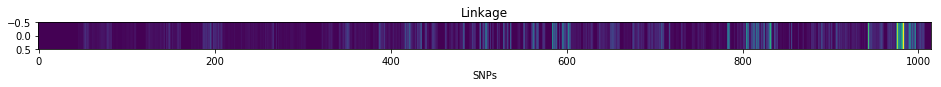

In [4]:
im, ax = plt.subplots (1,1, figsize = (16,3))
ax.imshow(np.expand_dims(linkage,0), aspect = 30)
ax.set (xlabel = "SNPs", title = "Linkage")
plt.show()

In [5]:
xtrain = d_geno[:3*I*N//4]
ytrain = d_haplo[:3*I*N//4]
xtest = d_geno[3*I*N//4:]
ytest = d_haplo[3*I*N//4:]
xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

((7500, 1015), (7500, 1015), (2500, 1015), (2500, 1015))

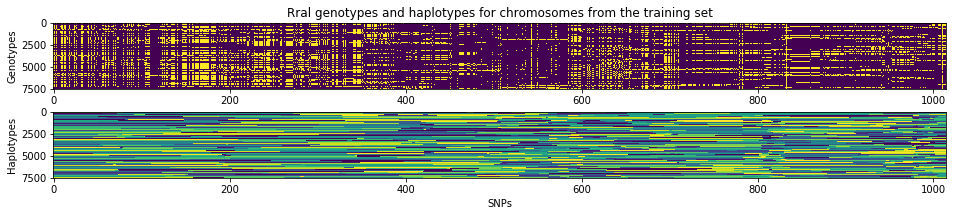

In [6]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(16,3))
ax1.imshow(xtrain, aspect = 0.01)
ax1.set(ylabel = "Genotypes", title = "Rral genotypes and haplotypes for chromosomes from the training set")
ax2.imshow(ytrain, aspect = 0.01)
ax2.set(ylabel = "Haplotypes", xlabel = "SNPs")
plt.show()

**Input genotypes** : creating an "image" with the descendant x17 alterning with the 16 founders and the linkage, in order to have a symmetrical input. The redundancy may even be usefull.

In [7]:
def chromosome_alternate_inputs_2 (array, F_geno, linkage, n):
    A = np.zeros((array.shape[0],array.shape[1],3*n+1))
    for k in range(len(array)) :
        individual = array[k]
        a = individual[:, np.newaxis]
        for l in range(len(F_geno)) :
            a=np.concatenate([a,F_geno[l:l+1].T, linkage[:, np.newaxis], individual[:, np.newaxis]], axis = 1)
        A[k]=a
    return A

**Output haplotypes** : founder origin for each SNP.

In [8]:
def chromosome_segments_output (array):
    A = np.zeros((len(array),len(array[0])//2,16))
    for k in range(len(array)) :
        individual = array[k]
        A[k] = np.array([np_utils.to_categorical(segment[1]-1,16) for segment in np.reshape(individual[:len(individual)//2*2],(-1,2))])
    return A

In [9]:
Xtrain = chromosome_alternate_inputs_2(xtrain, F_geno, linkage, n)
display(Xtrain.shape)
Ytrain = chromosome_segments_output(ytrain)
display(Ytrain.shape)
Xtest = chromosome_alternate_inputs_2(xtest, F_geno, linkage, n)
display(Xtest.shape)
Ytest = chromosome_segments_output(ytest)
display(Ytest.shape)

(7500, 1015, 49)

(7500, 507, 16)

(2500, 1015, 49)

(2500, 507, 16)

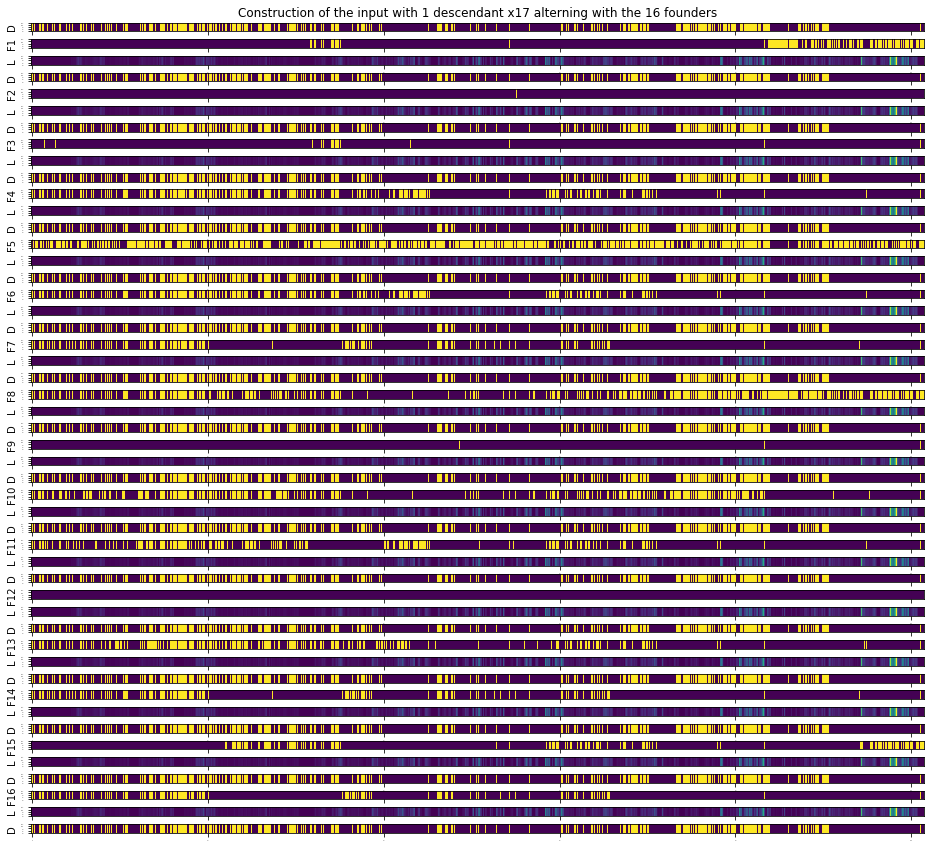

In [10]:
plt.rc('xtick', labelsize=0)    # fontsize of the tick labels
plt.rc('ytick', labelsize=0)    # fontsize of the tick labels
plt.rc('axes', labelsize=10)    # fontsize of the x and y labels
im, ax = plt.subplots(49,1,figsize=(16,15))
ax[0].set(title = 'Construction of the input with 1 descendant x17 alterning with the 16 founders')
for k in range(len(ax)) :
    ax[k].imshow(np.expand_dims(Xtrain[0,:,k], axis = 1).T, aspect = 10)
    ax[k].set(ylabel = "{individual}".format(individual="D" if k%3 == 0 else "F{}".format(k//3+1) if k%3 == 1 else "L"))
plt.show()
plt.rc('axes', labelsize=15)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10)    # fontsize of the tick labels

This construction for the input is the one that **worked best with only CNN**.

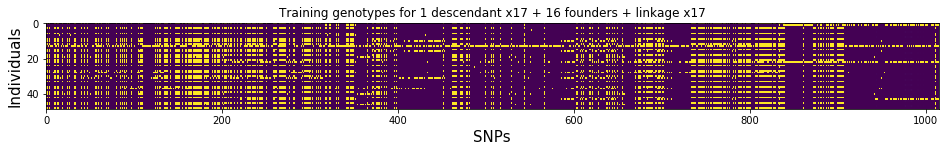

In [11]:
im, ax = plt.subplots(1,1,figsize=(16,10))
ax.imshow(Xtrain[0].T, aspect = 2)
ax.set(xlabel = "SNPs", ylabel = "Individuals", title = "Training genotypes for 1 descendant x17 + 16 founders + linkage x17")
plt.show()

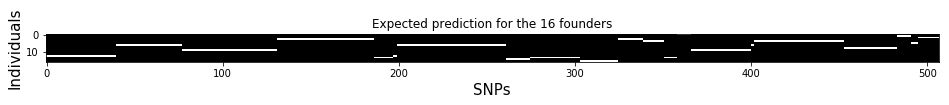

In [12]:
im, ax = plt.subplots(1,1,figsize=(16,6))
ax.imshow(Ytrain[0].T, aspect = 1, cmap = "Greys_r")
ax.set(xlabel = "SNPs", ylabel = "Individuals", title = "Expected prediction for the 16 founders")
plt.show()

### Define and train the model

In [13]:
K.clear_session()

model_4 = Sequential()
model_4.add(Conv1D(49, kernel_size=2,
                 activation='relu',
                 input_shape=Xtest.shape[1:],
                 padding = 'same'))
model_4.add(Conv1D(30, kernel_size=2, activation='relu', padding = 'same'))
model_4.add(AveragePooling1D(pool_size=2,strides=2))
model_4.add(Dropout(0.25))
model_4.add(Conv1D(16, kernel_size=2, activation='relu', padding = 'same'))
model_4.add(Dropout(0.25))
model_4.add(TimeDistributed(Dense(16, activation='relu')))
model_4.add(Dropout(0.5))
model_4.add(TimeDistributed(Dense(16, activation='relu')))
model_4.add(Dropout(0.5))
model_4.add(Bidirectional(LSTM(8, return_sequences=True)))
model_4.add(TimeDistributed(Dense(Ytest.shape[2], activation='softmax')))
model_4.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])
filepath="LSTM4_model_weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
print(model_4.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 1015, 49)          4851      
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 1015, 30)          2970      
_________________________________________________________________
average_pooling1d_1 (Average (None, 507, 30)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 507, 30)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 507, 16)           976       
_________________________________________________________________
dropout_2 (Dropout)          (None, 507, 16)           0         
_________________________________________________________________
time_distributed_1 (TimeDist (None, 507, 16)           272       
__________

In [14]:
plot_model(model_4, show_shapes=True, to_file='Models/LSTM4_model.png')

**Train model** : not performed on the notebook.

```
epochs=100
model_4.fit(Xtrain, Ytrain,
          epochs=epochs,
          callbacks=callbacks_list,
          verbose=1,
          validation_data=(Xtest, Ytest))
```

$\to$ Reached **43% accuracy after 99 epochs**.

## Bidirectional LSTM

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense, TimeDistributed, Bidirectional
from keras.callbacks import ModelCheckpoint
from keras import backend as K
from keras.utils import np_utils, plot_model
import pickle
%matplotlib inline

### Format input and output

For now, only working on **1015 SNPs sampled from the 37525 SNPs of the real founder genotypes**.

In [3]:
n = 16    # founders
p = 1015  # nb of SNPs
G = 20    # nb of generations
N = 100   # number recombining individuals in a generation after sampling
I = 100   # nb of iterations

**Import simulations** : genotypes and haplotypes, F = founders, d = descendants.

In [31]:
with open("Recombinations_haplotypes_n{0}_p{1}_G{2}_N{3}_I{4}.pkl".format(n,p,G,N,I),"rb") as handler:
    haplo = pickle.load(handler)
    F_haplo = np.array(haplo[:n])
    d_haplo = np.array(haplo[n:])
display(F_haplo.shape,d_haplo.shape)

with open("Recombinations_genotypes_n{0}_p{1}_G{2}_N{3}_I{4}.pkl".format(n,p,G,N,I),"rb") as handler:
    geno = pickle.load(handler)
    F_geno = np.array(geno[:n])
    d_geno = np.array(geno[n:])

display(F_geno.shape,d_geno.shape)

(16, 1015)

(10000, 1015)

(16, 1015)

(10000, 1015)

In [32]:
xtrain = d_geno[:3*I*N//4]
ytrain = d_haplo[:3*I*N//4]
xtest = d_geno[3*I*N//4:]
ytest = d_haplo[3*I*N//4:]
xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

((7500, 1015), (7500, 1015), (2500, 1015), (2500, 1015))

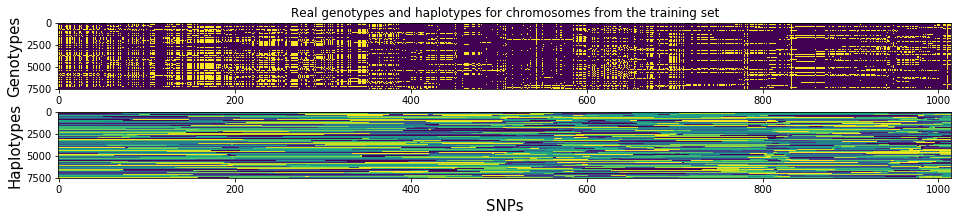

In [33]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(16,3))
ax1.imshow(xtrain, aspect = 0.01)
ax1.set(ylabel = "Genotypes", title = "Real genotypes and haplotypes for chromosomes from the training set")
ax2.imshow(ytrain, aspect = 0.01)
ax2.set(ylabel = "Haplotypes", xlabel = "SNPs")
plt.show()

**Input genotypes** : creating an "image" with the descendant x17 alterning with the 16 founders.

In [34]:
def chromosome_input (array, F_geno, n):
    A = np.zeros((array.shape[0],array.shape[1],n+1))
    for k in range(len(array)) :
        individual = array[k]
        a = individual[:, np.newaxis]
        for l in range(len(F_geno)) :
            a=np.concatenate([a,F_geno[l:l+1].T], axis = 1)
        A[k]=a
    return A

**Output haplotypes** : founder origin for each SNP.

In [35]:
def chromosome_output (array):
    A = np.zeros((array.shape[0],array.shape[1],16))
    k = 0
    for individual in array :
        A[k] = np_utils.to_categorical(individual-1,16)
        k += 1
    return A

In [36]:
Xtrain = chromosome_input(xtrain, F_geno, n)
display(Xtrain.shape)
Ytrain = chromosome_output(ytrain)
display(Ytrain.shape)
Xtest = chromosome_input(xtest, F_geno, n)
display(Xtest.shape)
Ytest = chromosome_output(ytest)
display(Ytest.shape)

(7500, 1015, 17)

(7500, 1015, 16)

(2500, 1015, 17)

(2500, 1015, 16)

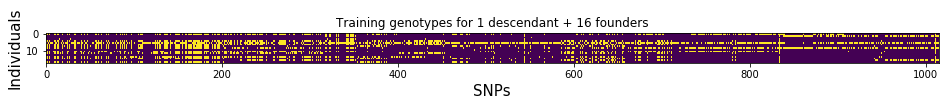

In [37]:
im, ax = plt.subplots(1,1,figsize=(16,6))
ax.imshow(Xtrain[0].T, aspect = 2)
ax.set(xlabel = "SNPs", ylabel = "Individuals", title = "Training genotypes for 1 descendant + 16 founders")
plt.show()

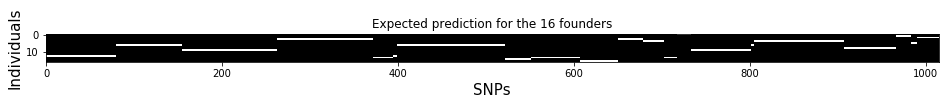

In [38]:
im, ax = plt.subplots(1,1,figsize=(16,6))
ax.imshow(Ytrain[0].T, aspect = 2, cmap = "Greys_r")
ax.set(xlabel = "SNPs", ylabel = "Individuals", title = "Expected prediction for the 16 founders")
plt.show()

### Define and train the model

In [39]:
K.clear_session()

model_5 = Sequential()
model_5.add(Bidirectional(LSTM(10, return_sequences=True), input_shape=Xtest.shape[1:]))
model_5.add(TimeDistributed(Dense(Ytest.shape[2], activation='softmax')))
model_5.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])
filepath="LSTM5_model_weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
print(model_5.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 1015, 20)          2240      
_________________________________________________________________
time_distributed_1 (TimeDist (None, 1015, 16)          336       
Total params: 2,576
Trainable params: 2,576
Non-trainable params: 0
_________________________________________________________________
None


In [40]:
plot_model(model_5, show_shapes=True, to_file='Models/LSTM5_model.png')

```
epochs=100
model_5.fit(Xtrain, Ytrain,
          epochs=epochs,
          callbacks=callbacks_list,
          verbose=1,
          validation_data=(Xtest, Ytest))
```

$\to$ **Similar results** than the previous CNN + LSTM model in twice the time.